In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(sys.path.append)
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline
sys.path.insert(0,'../scripts/')
from utils import missing_values_table,split_date
from data_outlier import Comp_Outlier
from data_cleaning import DataCleaning

In [100]:
cleaner= DataCleaning()

DataCleaning module
Dataset Clearning Module


In [10]:
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
# import dvc.api as DvcApi
# path = "data/data/driver_locations_during_request.csv"
# repo = "../"
# version = "eo-v1"
# remote = "eo-remote"

# data_url = DvcApi.get_url(path = path, repo = repo, rev = version,remote= remote) 
# data = pd.read_csv(data_url)

In [14]:
data = pd.read_csv("../data/driver_locations_during_request.csv")

In [15]:
# data.head(1)

In [17]:
df = data.copy()
df.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


As we notice that the most drivers rejected the order in this dataset. It seems that this is an imbalanced dataset

In [18]:
df.drop(['created_at', 'updated_at'], axis=1, inplace=True)

In [19]:
df_loc_req= df.copy()

In [7]:
df_loc_req.head(1)

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465


In [8]:
# check thte null values if exist
df_loc_req.isnull().sum()

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64

`Exploratory Data Analysis`
- `Univarient Analysis`
1. driver actions


<AxesSubplot:>

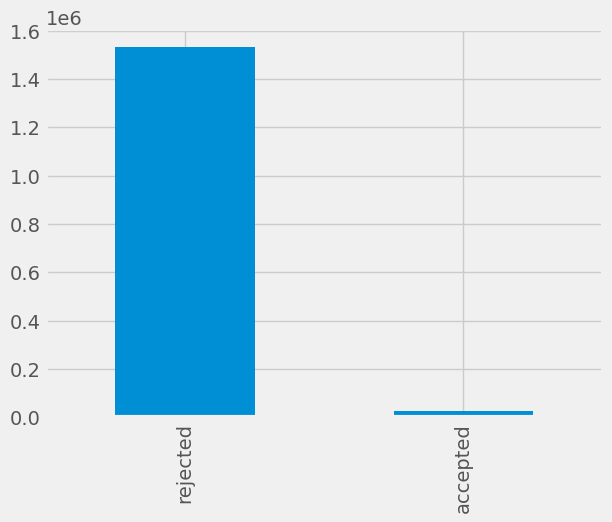

In [14]:
# plot number of driver_actions 
df_loc_req.driver_action.value_counts().plot(kind='bar')

In [15]:
df_loc_req["driver_action"].value_counts(normalize=True)

rejected    0.983371
accepted    0.016629
Name: driver_action, dtype: float64

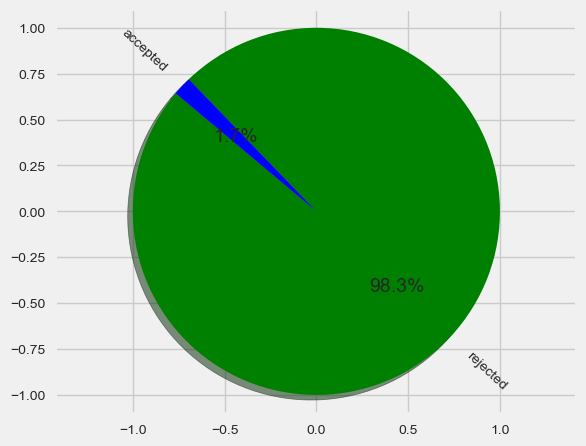

In [158]:
data_year = pd.DataFrame(df_loc_req["driver_action"].value_counts(normalize=True).reset_index())
plt.figure(figsize=(6,5))
plt.subplot()
plt.pie(data=data_year,x="driver_action",autopct="%1.1f%%",labels="index",shadow=True,startangle=140,frame=True,colors=["green","blue"],rotatelabels=True)
plt.axis("equal")
plt.show()

<AxesSubplot:xlabel='driver_action'>

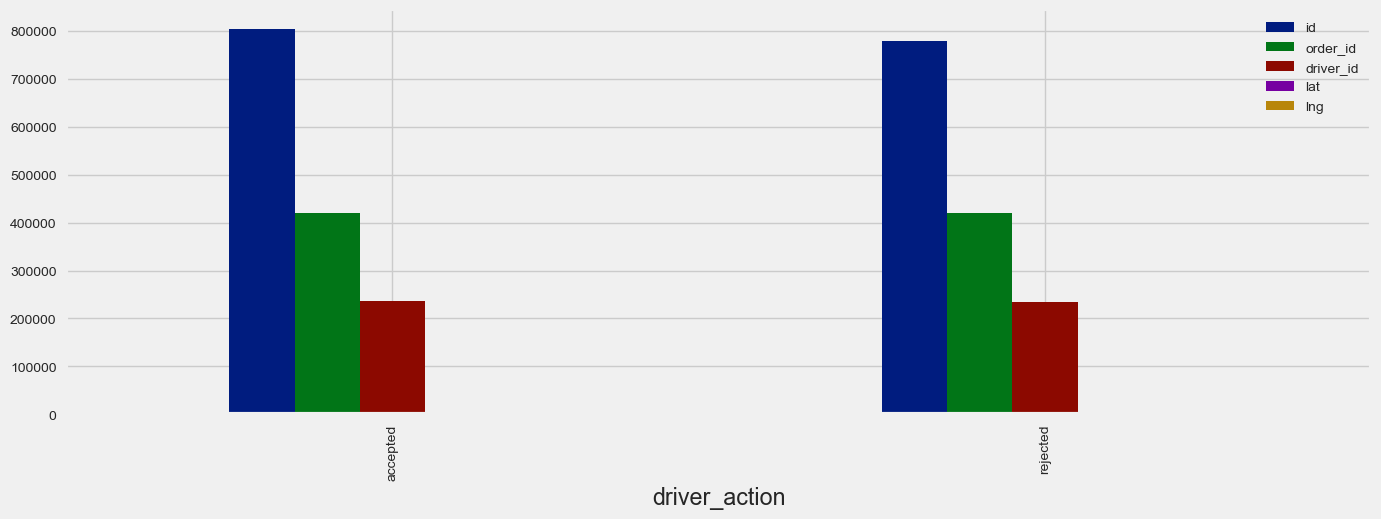

In [169]:
# aveverage of each trip according to the driver actions
actions = df_loc_req.groupby('driver_action').mean()
actions.plot(kind = 'bar',figsize=(15,5))

`Load trip dataset `

In [20]:
df_nb = pd.read_csv("../data/nb.csv")

In [21]:
df_nb.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [36]:
# convert "Trip Start Time" and "Trip End Time"  objects into timestamps
df_nb['Trip_Origin_lat'] = df_nb['Trip Origin'].apply(lambda x: str(x).split(',')[0])
df_nb['Trip_Origin_lng'] = df_nb['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [37]:
df_nb.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339


In [26]:
df_nb.shape, df.shape

((536020, 7), (1557740, 6))

In [27]:
missing_values_table(df_loc_req)
# no missing values

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [28]:
missing_values_table(df_nb)
# we cant afford to drop the missing values since it is only 0.3%

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Trip Start Time,1651,0.3,object
Trip End Time,1,0.0,object


In [38]:
data_nb= df_nb.copy()

In [39]:
# drop null values
data_nb.dropna(inplace=True)

In [40]:
missing_values_table(data_nb)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [41]:
data_nb.dtypes

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
Trip_Origin_lat     object
Trip_Origin_lng     object
dtype: object

In [42]:
split_date(data_nb,'Trip End Time' )

In [43]:
data_nb.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Date,Year,Month,Day,WeekOfYear,Day of Week,Is Weekend,dayofweek
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,2021-07-01 07:29:37,2021,7,1,26,3,False,Thursday


In [44]:
data_nb.dtypes

Trip ID                      int64
Trip Origin                 object
Trip Destination            object
Trip Start Time             object
Trip End Time               object
Trip_Origin_lat             object
Trip_Origin_lng             object
Date                datetime64[ns]
Year                         int64
Month                        int64
Day                          int64
WeekOfYear                  UInt32
Day of Week                  int64
Is Weekend                    bool
dayofweek                   object
dtype: object

`Feature Engineering`

In [45]:
# convert "Trip Start Time" and "Trip End Time"  objects into timestamps
data_nb["Trip Start Time"] =pd.to_datetime(data_nb["Trip Start Time"])
data_nb["Trip End Time"] =pd.to_datetime(data_nb["Trip End Time"])
# data_nb['Duration_Minutes'] = data_nb['Trip End Time'] - data_nb['Trip Start Time']

In [46]:
# separate latitide and longitide from the same column 
# data_nb['Trip_Origin_lat'] = data_nb['Trip Origin'].apply(lambda x: str(x).split(',')[0])
# data_nb['Trip_Origin_lng'] = data_nb['Trip Origin'].apply(lambda x: str(x).split(',')[1])
data_nb['Trip_Destination_lat'] = data_nb['Trip Destination'].apply(lambda x: str(x).split(',')[0])
data_nb['Trip_Destination_lng'] = data_nb['Trip Destination'].apply(lambda x: str(x).split(',')[1])
data_nb["Is Weekend"] = data_nb["Is Weekend"].astype(int)

In [47]:
# drop tip origin and trip destination column
data_nb.drop(['Trip Origin','Trip Destination'], inplace=True, axis =1)

In [48]:
# calculate duration of each trip in minutes
minutes=[]
data_nb['Duration_Minutes'] = data_nb['Trip End Time'] - data_nb['Trip Start Time']
data_nb['Duration_Minutes']
for x in data_nb['Duration_Minutes']:
    minutes.append(x.seconds / 60)

data_nb['Duration_Minutes'] = minutes
data_nb['Duration_Minutes']=data_nb['Duration_Minutes'].apply(np.ceil)

In [49]:
data_nb.head(1)

,Trip ID,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Date,Year,Month,Day,WeekOfYear,Day of Week,Is Weekend,dayofweek,Trip_Destination_lat,Trip_Destination_lng,Duration_Minutes
0,391996,2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,2021-07-01 07:29:37,2021,7,1,26,3,0,Thursday,6.650969799999999,3.3450307,2.0


In [50]:
data_nb.dtypes

Trip ID                          int64
Trip Start Time         datetime64[ns]
Trip End Time           datetime64[ns]
Trip_Origin_lat                 object
Trip_Origin_lng                 object
Date                    datetime64[ns]
Year                             int64
Month                            int64
Day                              int64
WeekOfYear                      UInt32
Day of Week                      int64
Is Weekend                       int64
dayofweek                       object
Trip_Destination_lat            object
Trip_Destination_lng            object
Duration_Minutes               float64
dtype: object

In [51]:
# create is a week end feature
data_nb["Is Weekend"] = data_nb["Is Weekend"].astype(int)

`Merge the two datasets`

In [ ]:
# merge the datasets
df_merged=df_loc_req.merge(data_nb, how='inner', left_on='order_id',right_on="Trip ID")

In [ ]:
df_merged.drop(['id','Trip ID','lat','lng'], axis=1,inplace=True)

` compute the distance`

In [72]:
df_merged = pd.read_csv('../data/df_merged.csv')

In [119]:
# df_merged.head(1)

In [64]:
from geopy.distance import great_circle as GRC

compute the distance

In [85]:
df_merged['distance'] = df_merged.apply(lambda row: GRC((row['Trip_Origin_lat'], 
row['Trip_Origin_lng']), (row['Trip_Destination_lat'], row['Trip_Destination_lng'])).km, axis=1)


In [86]:
df_merged.head()

,order_id,driver_id,driver_action,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Date,Year,Month,Day,WeekOfYear,Day of Week,Is Weekend,dayofweek,Trip_Destination_lat,Trip_Destination_lng,Duration_Minutes,distance
0,392001,243828,accepted,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0,21.048292
1,392001,243588,rejected,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0,21.048292
2,392001,243830,rejected,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0,21.048292
3,392001,243539,rejected,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0,21.048292
4,392001,171653,rejected,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0,21.048292


In [87]:
df_merged.to_csv('../data/df_merged_final',index=False)

In [9]:
# df_merged['Distance']=[round(geopy.distance.distance((df_merged.Trip_Origin_lat[i],
#                         df_merged.Trip_Origin_lng[i]),
#                         (df_merged.Trip_Destination_lat[i], df_merged.Trip_Destination_lng [i])).m,2) 
#                         for i in df_merged.index]

# # df_merged.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

# original_df = df_merged.copy(deep=True)

` Visualization`

Text(0.5, 1.0, 'Number of trips per Month')

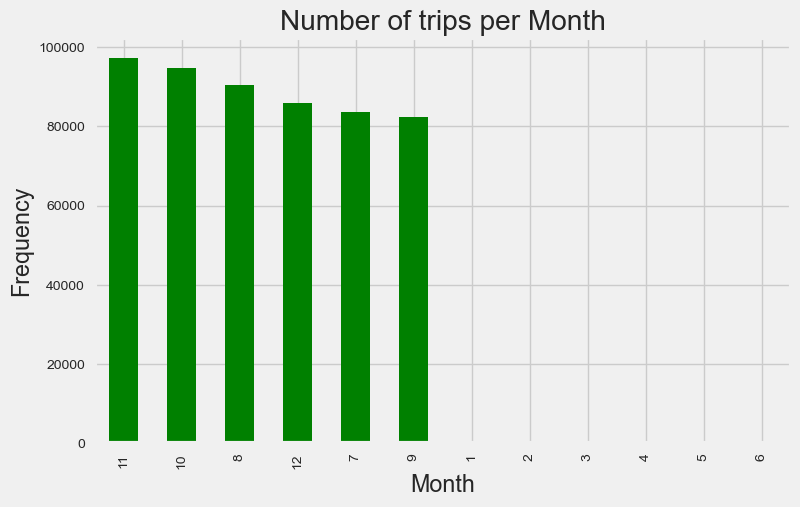

In [141]:
# plot number of trips at each month
from __future__ import annotations

x = data_nb['Month'].value_counts()
x.plot(kind='bar',figsize=(8,5),color='green')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

Text(0.5, 1.0, 'Number of trips per hour')

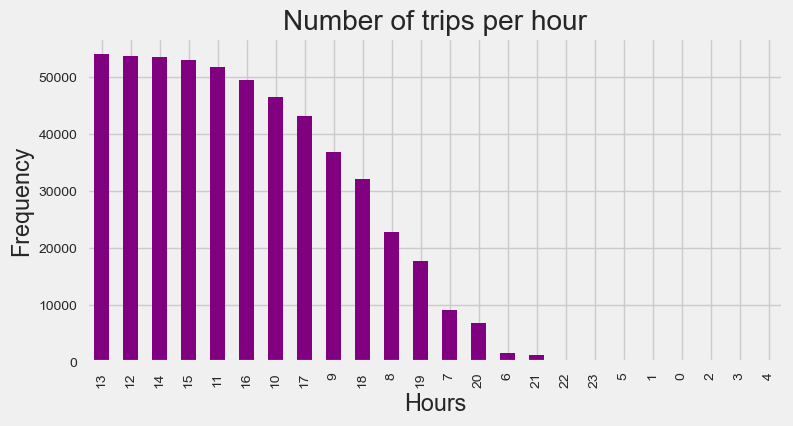

In [142]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = data_nb['Trip Start Time'].dt.hour.value_counts()
hours.plot(kind='bar',color='purple',figsize=(8,4))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

In [182]:
data_nb1=data_nb.describe()

In [1]:
# data_nb

In [192]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

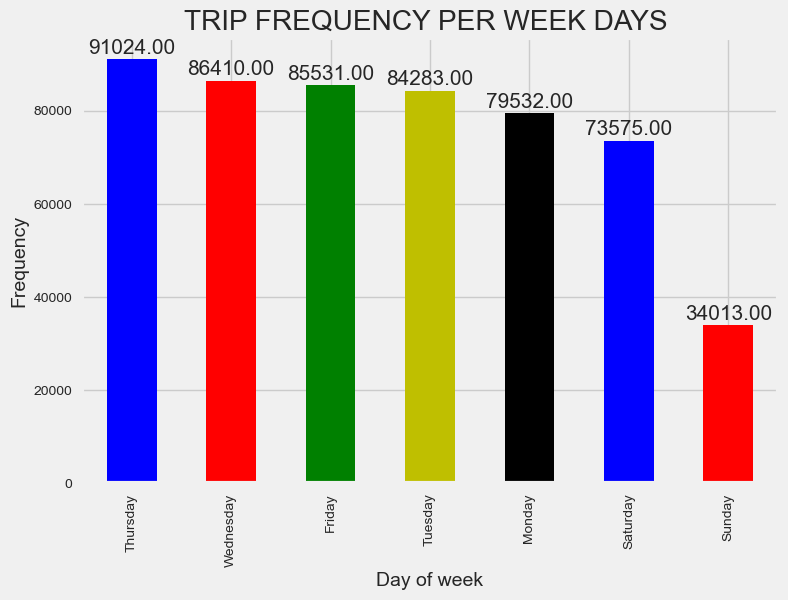

In [193]:
import seaborn as sns
plots = data_nb['dayofweek'].value_counts().plot(kind='bar',color=my_colors)
 
for bar in plots.patches:
 
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Day of week", size=14)
 
# Setting the label for y-axis
plt.ylabel("Frequency", size=14)
 
# Setting the title for the graph
plt.title("TRIP FREQUENCY PER WEEK DAYS ")
 
# Finally showing the plot
plt.show()

Trips are fairly equal on a dayly basis except sundays.

In [55]:
missing_values_table(df_merged)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [209]:
# ! pip install geopy

In [83]:
merged_df = pd.read_csv('../data/df_merged.csv')

In [84]:
merged_df.head(1)

,order_id,driver_id,driver_action,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Date,Year,Month,Day,WeekOfYear,Day of Week,Is Weekend,dayofweek,Trip_Destination_lat,Trip_Destination_lng,Duration_Minutes
0,392001,243828,accepted,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,2021-07-01 09:34:36,2021,7,1,26,3,0,Thursday,6.450107,3.391615,4.0


# Further future engineering 

`calculate the speed given the start and end time`

In [89]:
df_fin=pd.read_csv('../data/df_merged_final.csv')

In [92]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555718 entries, 0 to 1555717
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   order_id              1555718 non-null  int64  
 1   driver_id             1555718 non-null  int64  
 2   driver_action         1555718 non-null  object 
 3   Trip Start Time       1555718 non-null  object 
 4   Trip End Time         1555718 non-null  object 
 5   Trip_Origin_lat       1555718 non-null  float64
 6   Trip_Origin_lng       1555718 non-null  float64
 7   Date                  1555718 non-null  object 
 8   Year                  1555718 non-null  int64  
 9   Month                 1555718 non-null  int64  
 10  Day                   1555718 non-null  int64  
 11  WeekOfYear            1555718 non-null  int64  
 12  Day of Week           1555718 non-null  int64  
 13  Is Weekend            1555718 non-null  int64  
 14  dayofweek             1555718 non-

In [94]:
df_fin['Speed_km/min']=df_fin['distance']/ df_fin['Duration_Minutes']

In [98]:
df_fin['distance'].describe()

count    1.555718e+06
mean     8.489182e+00
std      6.349889e+00
min      1.647106e-02
25%      4.008269e+00
50%      6.919488e+00
75%      1.131920e+01
max      6.828784e+02
Name: distance, dtype: float64

` compute the holydays`

In [102]:
# convert the Trip Start Time and Trip End Time columns into time stamps
df_fin["Trip Start Time"] =pd.to_datetime(df_fin["Trip Start Time"])
df_fin["Trip End Time"] =pd.to_datetime(df_fin["Trip End Time"])

In [105]:
df_cleaned = cleaner.add_holiday_feature(df_fin)

In [107]:
columns=['order_id',
 'driver_id',
 'driver_action',
 'Trip Start Time',
 'Trip End Time',
 'Trip_Origin_lat',
 'Trip_Origin_lng',
 'Trip_Destination_lat',
 'Trip_Destination_lng',
 'Date',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'Day of Week',
 'Is Weekend',
 'dayofweek',
 'Duration_Minutes',
 'distance',
 'Speed_km/min',
 'holiday']

In [112]:
df_cleaned= df_cleaned[columns]

In [113]:
df_cleaned.holiday.value_counts()

False    1555718
Name: holiday, dtype: int64

In [117]:
# df_cleaned.head()

In [7]:
df_merged.columns.to_list()

In [17]:
# df_merged=df_merged[col]
# df_merged['driver_proximity'] = df_merged.apply(lambda row: GRC( (row['lat'], row['lng']),(row['origin_lat'], row['origin_lon'])).m, axis=1)


In [115]:
from geopy import distance
df_cleaned['long_distance']=df_cleaned.apply(lambda x:distance.distance((x["Trip_Origin_lat"],x["Trip_Origin_lng"]), 
(x["Trip_Destination_lat"],x["Trip_Destination_lng"])).km,axis=1)

In [118]:
# df_cleaned

In [111]:
df_cleaned.to_csv('../data/df_cleaned_final.csv',index=False)